In [7]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
importlib.reload(lpfet)

<module 'lpfet' from 'C:\\Users\\tinc9\\Documents\\CNRS-offline\\quantum_main_project\\LPFET\\lpfet.py'>

# 6 site ring with 2 atoms on opposite site

```
  o -- o
 /      \
x        x   
 \      /
  o -- o
  
```
Potential on sites are +i for o and -i for x

# Reset of Hxc potential each cycle

In [2]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object("_6ring2sites_v2")
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.51167998 0.49416001 0.49416001 0.51167998 0.49416001 0.49416001]
0.25 0.12195121951219513
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.55830505 0.47084747 0.47084747 0.55830505 0.47084747 0.47084747]
0.45 0.21951219512195125
Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.60449367 0.44775317 0.44775317 0.60449367 0.44775317 0.44775317]
0.6500000000000001 0.31707317073170743
Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.64970356 0.42514822 0.42514822 0.64970356 0.42514822 0.42514822]
0.8500000000000001 0.4146341463414635
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.69317802 0.40341099 0.40341099 0.69317802 0.40341099 0.40341099]
1.05 0.5121951219512195
Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.73403878 0.38298061 0.38298061 0.73403878 0.38298061 0.38298061

results/2022_02_16_14_00_6ring2sites_v2_molecule.png


C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project\LPFET\lpfet.py:323: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


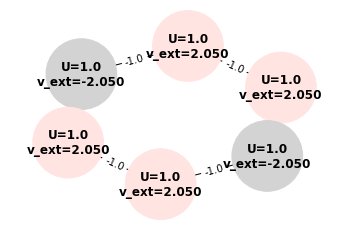

In [3]:
mol1.plot_hubbard_molecule()

In [4]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y = np.array(y)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

C:\Users\tinc9\AppData\Local\Temp/ipykernel_14836/3924717441.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


Text(0, 0.5, 'occupation of site 0 and 3')

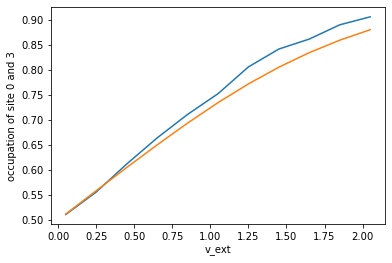

In [5]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

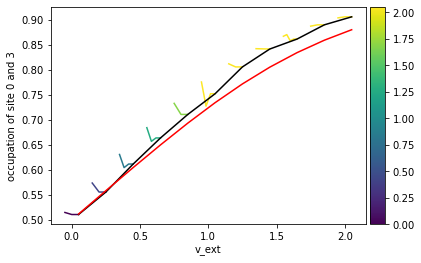

In [8]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))


for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

# Not reseting external potential

In [9]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
for i in x:
    mol1.density_progress = []
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.51167998 0.49416001 0.49416001 0.51167998 0.49416001 0.49416001]
0.25 0.12195121951219513
Loop 0, Loop 1, FCI densities (per spin): [0.55830505 0.47084747 0.47084747 0.55830505 0.47084747 0.47084747]
0.45 0.21951219512195125
Loop 0, Loop 1, FCI densities (per spin): [0.60449367 0.44775317 0.44775317 0.60449367 0.44775317 0.44775317]
0.6500000000000001 0.31707317073170743
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.64970356 0.42514822 0.42514822 0.64970356 0.42514822 0.42514822]
0.8500000000000001 0.4146341463414635
Loop 0, Loop 1, FCI densities (per spin): [0.69317802 0.40341099 0.40341099 0.69317802 0.40341099 0.40341099]
1.05 0.5121951219512195
Loop 0, Loop 1, FCI densities (per spin): [0.73403878 0.38298061 0.38298061 0.73403878 0.38298061 0.38298061]
1.2500000000000002 0.6097560975609758
Loop 0, Loop 1, 

In [10]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

Text(0, 0.5, 'occupation of site 0 and 3')

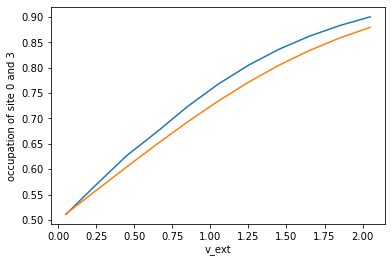

In [11]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

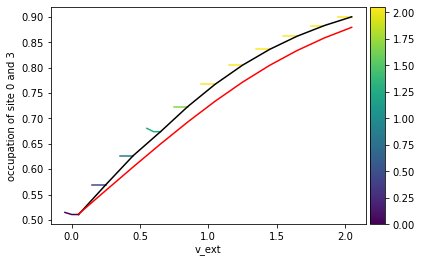

In [12]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

# Finding stability of convergence based on initial parameters of Hxc chemical potential

## v_ext = +- 1.0

In [14]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v3')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []
n_ref = []
iter_num = []
pmv = 1
first = True
for i in x:
    n.append([])
    n_ref.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_v2")
        first = False
        print(i, j, 100 * i/len(x))
        t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])
y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 -1.2 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, -1.5 -0.8999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 -0.5999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 -0.2999999999999998 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 2.220446049250313e-16 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Lo

' '

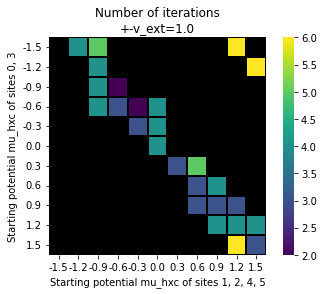

In [15]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
ax.set_facecolor('k')
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '


In [16]:
iter_num_exaggerated

array([[20,  4,  5, 20, 20, 20, 20, 20, 20,  6, 20],
       [20, 20,  4, 20, 20, 20, 20, 20, 20, 20,  6],
       [20, 20,  4,  2, 20, 20, 20, 20, 20, 20, 20],
       [20, 20,  4,  3,  2,  4, 20, 20, 20, 20, 20],
       [20, 20, 20, 20,  3,  4, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20,  4, 20, 20, 20, 20, 20],
       [20, 20, 20, 20, 20, 20,  3,  5, 20, 20, 20],
       [20, 20, 20, 20, 20, 20, 20,  3,  4, 20, 20],
       [20, 20, 20, 20, 20, 20, 20,  3,  3,  3, 20],
       [20, 20, 20, 20, 20, 20, 20, 20,  4,  4,  4],
       [20, 20, 20, 20, 20, 20, 20, 20, 20,  6,  3]])

  -0.296   +0.037   +0.015   +0.094   +0.216   +0.215   +0.212   +0.214   +0.214   +0.265   +0.212
  -0.289   -0.066   +0.024   +0.215   +0.216   +0.212   +0.217   +0.215   +0.217   +0.215   +0.264
  -0.065   -0.289   +0.018   +0.009   +0.212   +0.214   +0.215   +0.215   +0.215   +0.214   +0.216
  -0.303   -0.290   +0.006   +0.035   +0.009   +0.001   +0.214   +0.212   +0.215   +0.215   +0.215
  -0.292   -0.303   -0.305   -0.065   +0.019   +0.020   +0.094   +0.216   +0.212   +0.217   +0.215
  -0.303   -0.290   -0.292   -0.304   -0.292   +0.017   +0.094   +0.217   +0.215   +0.212   +0.212
  -0.303   -0.296   -0.302   -0.290   -0.065   -0.303   +0.019   +0.017   +0.094   +0.213   +0.212
  -0.296   -0.303   -0.301   -0.301   -0.290   -0.290   -0.289   +0.020   +0.040   +0.217   +0.214
  -0.303   -0.290   -0.289   -0.290   -0.292   -0.292   -0.290   +0.000   +0.012   +0.035   +0.094
  -0.302   -0.290   -0.301   -0.292   -0.301   -0.304   -0.290   -0.289   +0.040   +0.027   +0.029
  -0.304  

' '

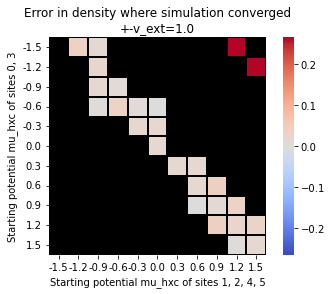

In [23]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref[0]
essentials.print_matrix(n_array-n_ref[0])
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
ax.set_facecolor('k')
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

' '

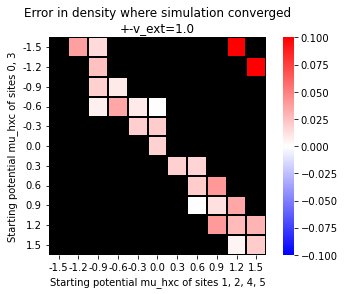

In [25]:

fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.1));
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

# OLD CALCUALTIONS!!

## v_ext = +- 0.5

In [66]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-0.5")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 0.5
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-0.5")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 -13.636363636363637
Loop 0, Loop 1, Loop 2, -1.5 -1.2 -13.636363636363637
Loop 0, Loop 1, Loop 2, -1.5 -0.8999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 -0.5999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 -0.2999999999999998 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 2.220446049250313e-16 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 0.30000000000000027 -13.636363636363637
Loop 0, Loop 1, Loop 

' '

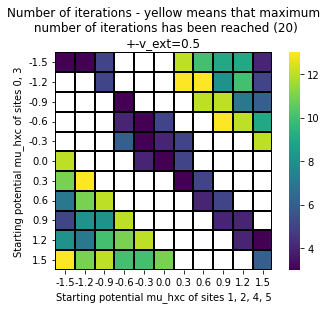

In [68]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations - yellow means that maximum\n number of iterations has been reached (20)\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.003   +0.008   +0.012   +0.180   +0.181   +0.182   +0.370   +0.367   +0.377   -0.587   -0.612
  -0.192   -0.191   -0.008   +0.180   +0.181   +0.181   +0.381   -0.587   -0.612   +0.368   +0.373
  -0.192   -0.191   -0.192   -0.011   +0.179   +0.181   +0.182   +0.370   +0.373   +0.375   +0.372
  -0.193   -0.192   -0.190   +0.008   -0.006   +0.010   +0.181   +0.181   -0.588   +0.369   +0.378
  -0.194   -0.193   -0.192   +0.011   -0.007   -0.007   +0.011   +0.181   +0.181   +0.182   +0.373
  +0.381   -0.194   -0.193   -0.192   +0.013   -0.005   -0.008   +0.179   +0.180   +0.181   +0.182
  +0.367   +0.371   -0.194   -0.193   -0.192   -0.192   +0.002   -0.007   +0.179   +0.181   +0.181
  +0.372   +0.370   +0.378   -0.194   -0.193   -0.192   -0.192   +0.009   +0.011   +0.180   +0.180
  -0.612   +0.376   +0.377   +0.373   -0.193   -0.193   -0.192   -0.192   +0.009   +0.014   +0.180
  +0.374   +0.373   -0.586   +0.367   -0.587   -0.193   -0.193   -0.192   -0.192   +0.010   +0.015
  +0.367  

' '

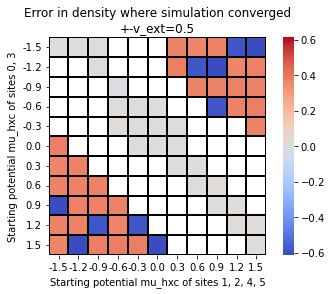

In [70]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.003   +0.008   +0.012   +0.180   +0.181   +0.182   +0.370   +0.367   +0.377   -0.587   -0.612
  -0.192   -0.191   -0.008   +0.180   +0.181   +0.181   +0.381   -0.587   -0.612   +0.368   +0.373
  -0.192   -0.191   -0.192   -0.011   +0.179   +0.181   +0.182   +0.370   +0.373   +0.375   +0.372
  -0.193   -0.192   -0.190   +0.008   -0.006   +0.010   +0.181   +0.181   -0.588   +0.369   +0.378
  -0.194   -0.193   -0.192   +0.011   -0.007   -0.007   +0.011   +0.181   +0.181   +0.182   +0.373
  +0.381   -0.194   -0.193   -0.192   +0.013   -0.005   -0.008   +0.179   +0.180   +0.181   +0.182
  +0.367   +0.371   -0.194   -0.193   -0.192   -0.192   +0.002   -0.007   +0.179   +0.181   +0.181
  +0.372   +0.370   +0.378   -0.194   -0.193   -0.192   -0.192   +0.009   +0.011   +0.180   +0.180
  -0.612   +0.376   +0.377   +0.373   -0.193   -0.193   -0.192   -0.192   +0.009   +0.014   +0.180
  +0.374   +0.373   -0.586   +0.367   -0.587   -0.193   -0.193   -0.192   -0.192   +0.010   +0.015
  +0.367  

' '

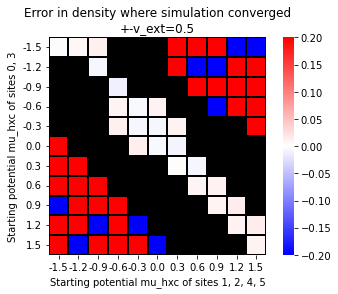

In [82]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## v_ext = +- 2

In [83]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-2")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 2
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-2")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 0.0
Loop 0, Loop 1, -1.5 -1.2 0.0
Loop 0, Loop 1, -1.5 -0.8999999999999999 0.0
Loop 0, Loop 1, -1.5 -0.5999999999999999 0.0
Loop 0, Loop 1, -1.5 -0.2999999999999998 0.0
Loop 0, Loop 1, -1.5 2.220446049250313e-16 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 0.30000000000000027 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, -1.5 0.6000000000000005 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, -1.5 0.9000000000000004 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 1.2000000000000002 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 1.5000000000000004 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, -1.2 -1.5 9.090909090909092
Loop 0, Loop 1, -1.2 -1.2 9.090909090909092
Loop 0, Loop 1, -1.2 -0.8999999999999999 9.090909090909092
Loop 0, Loop 1, -1.2 -0.5999999999999999 9.090909090909092
Loop 0, Loop 1, -1.2 -0.2999999999999998 9.09

' '

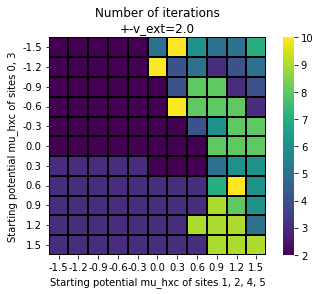

In [86]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  +0.025   +0.012   -0.003   -0.020   -0.040   -0.860   -0.102   -0.848   -0.102   -0.123   -0.102
  +0.036   +0.025   +0.012   -0.003   -0.020   -0.102   +0.122   +0.030   -0.095   -0.083   -0.104
  +0.045   +0.036   +0.025   +0.012   -0.003   -0.020   +0.117   -0.105   -0.105   -0.102   -0.087
  +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.103   -0.102   -0.102   -0.088
  +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   +0.124   +0.121   -0.124   -0.124
  +0.066   +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.123   -0.124
  +0.050   +0.060   +0.054   +0.046   +0.038   +0.036   +0.025   +0.012   +0.084   -0.105   -0.105
  +0.054   +0.046   +0.038   +0.029   +0.019   +0.008   +0.024   +0.013   -0.758   -0.102   -0.123
  +0.061   +0.055   +0.048   +0.040   +0.031   +0.021   +0.011   -0.001   -0.124   -0.105   -0.102
  +0.061   +0.055   +0.048   +0.040   +0.030   +0.020   +0.008   -0.124   -0.124   -0.123   +0.074
  +0.049  

' '

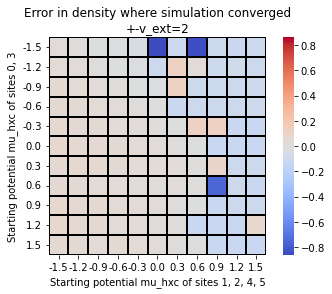

In [87]:
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  +0.025   +0.012   -0.003   -0.020   -0.040   -0.860   -0.102   -0.848   -0.102   -0.123   -0.102
  +0.036   +0.025   +0.012   -0.003   -0.020   -0.102   +0.122   +0.030   -0.095   -0.083   -0.104
  +0.045   +0.036   +0.025   +0.012   -0.003   -0.020   +0.117   -0.105   -0.105   -0.102   -0.087
  +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.103   -0.102   -0.102   -0.088
  +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   +0.124   +0.121   -0.124   -0.124
  +0.066   +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.123   -0.124
  +0.050   +0.060   +0.054   +0.046   +0.038   +0.036   +0.025   +0.012   +0.084   -0.105   -0.105
  +0.054   +0.046   +0.038   +0.029   +0.019   +0.008   +0.024   +0.013   -0.758   -0.102   -0.123
  +0.061   +0.055   +0.048   +0.040   +0.031   +0.021   +0.011   -0.001   -0.124   -0.105   -0.102
  +0.061   +0.055   +0.048   +0.040   +0.030   +0.020   +0.008   -0.124   -0.124   -0.123   +0.074
  +0.049  

' '

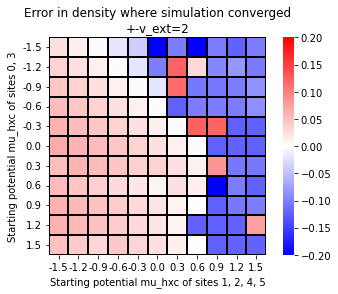

In [88]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## Conclussions
It looks like convergence and error of the algorithm is dependent primarily the **difference** on starting values of $v^{Hxc}$. \
It also looks like I can reduce dimensionality of this problem by only taking starting Hxc potential (-x, x, x, -x, x, x) \
From only 2 examples it looks like that for larger $\Delta v^{ext}$ there is higher optimal difference in starting Hxc chemical potentials.

# New way to adjust potential (hopefully)

## Comparison with the first experiment

In [39]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_pot_adjustment')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
mu_hxc_list = []
first = True
for i in x:
    if not first:
        mol1.clear_object("_6ring2sites_pot_adjustment")
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001, oscillation_compensation=1)
    
    y.append(mol1.density_progress.copy())
    mu_hxc_list.append(mol1.mu_hxc_progress.copy())
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())




	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, FCI densities (per spin): [0.51167998 0.49416001 0.49416001 0.51167998 0.49416001 0.49416001]
0.25 0.12195121951219513
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, FCI densities (per spin): [0.55830505 0.47084747 0.47084747 0.55830505 0.47084747 0.47084747]
0.45 0.21951219512195125
Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.60449367 0.44775317 0.44775317 0.60449367 0.44775317 0.44775317]
0.6500000000000001 0.31707317073170743
Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.64970356 0.42514822 0.42514822 0.64970356 0.42514822 0.42514822]
0.8500000000000001 0.4146341463414635
Loop 0, Loop 1, -0.439890212405367->0.3377363661773313->-0.3201536606666376!=-0.5394503362812939
Loop 2, Loop 3, Loop 4, Loop 5, FCI densities (per spin): [0.69317802 0.40341099 0.40341099 0.69317802 0.40341099 0.40341099]
1.05 0.5121

In [40]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
    mu_hxc_list[i] = np.array(mu_hxc_list[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

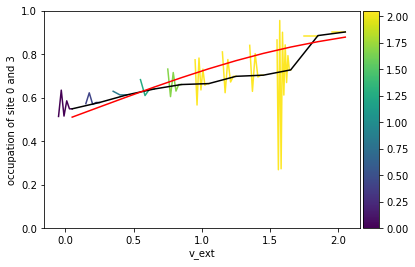

In [41]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()

v_ext= 1.4500000000000002


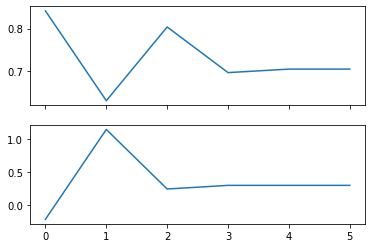

In [43]:
ind1 = 7
print('v_ext=', x[ind1])
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(y[ind1][:,0])
ax[1].plot(mu_hxc_list[ind1][:,0])

This looks much more promising. Lets test what happens with the other experiment 

## Testing for v_ext=1

In [86]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_pot_adjustment_vext-1_6ring2sites_pot_adjustment_vext-1")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 1
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
mu_hxc_0 = []
mu_hxc_1 = []
for i_id, i in enumerate(x):
    n.append([])
    mu_hxc_0.append([])
    mu_hxc_1.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_pot_adjustment_vext-1_6ring2sites_pot_adjustment_vext-1")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001, oscillation_compensation=1))
        n[-1].append(mol1.n_ks[0])
        mu_hxc_0[-1].append(mol1.mu_hxc[0])
        mu_hxc_1[-1].append(mol1.mu_hxc[1])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 0.0
Loop 0, Loop 1, -1.5->1.8598399941518684->-0.6732850867898232!=-1.5176601137703873
0.8422791479076617->0.5662099634022871->0.844113547341534!=0.9367480753212829
Loop 2, Loop 3, -0.6732850867898232->0.762319633525158->-0.29574591067263645!=-0.6484344254052345
0.844113547341534->0.6782493016754807->0.7958976047315587!=0.8351137057502513
Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, -1.5 -1.2 0.0
Loop 0, Loop 1, -0.5521196490504643->0.5981198229560517->-0.21155870115423114!=-0.48145154252432554
0.8256929285824299->0.7636627944148289->0.8084467553682849!=0.8233747423527703
Loop 2, Loop 3, Loop 4, Loop 5, -1.5 -0.8999999999999999 0.0
Loop 0, Loop 1, -0.4529610429125802->0.6893746123536477->-0.22633453193585695!=-0.5315709133656918
0.7893645348940398->0.7777459886183268->0.819796401835997!=0.833813206241887
Loop 2, 0.7777459886183268->0.819796401835997->0.7877381662293739!=0.7770520876938328

### Usual graphs

' '

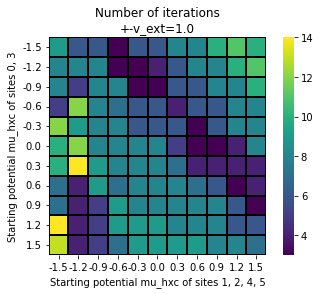

In [52]:

iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title('Number of iterations\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.063   -0.048   -0.046   -0.064   -0.060   -0.067   -0.064   -0.057   -0.060   -0.048   -0.055
  -0.048   -0.048   -0.049   -0.040   -0.052   -0.061   -0.064   -0.064   -0.059   -0.061   -0.048
  -0.049   -0.510   -0.049   -0.049   -0.043   -0.032   -0.060   -0.069   -0.064   -0.059   -0.060
  +0.102   -0.044   -0.064   -0.061   -0.048   -0.046   -0.058   -0.063   -0.067   -0.065   -0.061
  -0.048   -0.064   -0.048   -0.048   -0.048   -0.048   -0.064   -0.058   -0.056   -0.061   -0.064
  -0.064   -0.044   -0.048   -0.048   -0.049   -0.064   -0.061   -0.052   -0.048   -0.062   -0.060
  -0.063   -0.048   -0.716   -0.046   -0.048   -0.048   -0.064   -0.044   -0.053   -0.062   -0.062
  -0.705   -0.067   -0.064   -0.713   -0.048   -0.048   -0.048   -0.061   -0.046   -0.039   -0.061
  -0.704   -0.067   -0.062   -0.064   -0.048   -0.048   -0.048   -0.048   -0.063   -0.048   -0.066
  -0.063   -0.067   -0.055   -0.064   -0.064   -0.064   -0.048   -0.049   -0.048   -0.048   -0.048
  -0.048  

' '

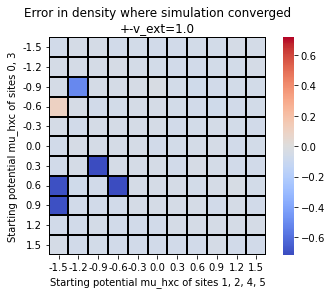

In [50]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.063   -0.048   -0.046   -0.064   -0.060   -0.067   -0.064   -0.057   -0.060   -0.048   -0.055
  -0.048   -0.048   -0.049   -0.040   -0.052   -0.061   -0.064   -0.064   -0.059   -0.061   -0.048
  -0.049   -0.510   -0.049   -0.049   -0.043   -0.032   -0.060   -0.069   -0.064   -0.059   -0.060
  +0.102   -0.044   -0.064   -0.061   -0.048   -0.046   -0.058   -0.063   -0.067   -0.065   -0.061
  -0.048   -0.064   -0.048   -0.048   -0.048   -0.048   -0.064   -0.058   -0.056   -0.061   -0.064
  -0.064   -0.044   -0.048   -0.048   -0.049   -0.064   -0.061   -0.052   -0.048   -0.062   -0.060
  -0.063   -0.048   -0.716   -0.046   -0.048   -0.048   -0.064   -0.044   -0.053   -0.062   -0.062
  -0.705   -0.067   -0.064   -0.713   -0.048   -0.048   -0.048   -0.061   -0.046   -0.039   -0.061
  -0.704   -0.067   -0.062   -0.064   -0.048   -0.048   -0.048   -0.048   -0.063   -0.048   -0.066
  -0.063   -0.067   -0.055   -0.064   -0.064   -0.064   -0.048   -0.049   -0.048   -0.048   -0.048
  -0.048  

' '

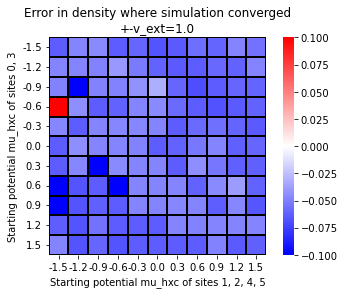

In [68]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.1));
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

Result:  -0.05435143632037365 +- 0.016738800510904848 (filtered out 6 outliers)


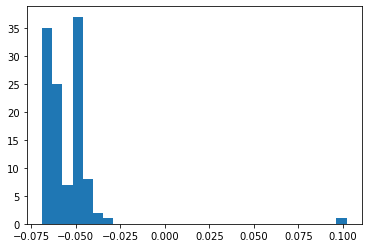

In [78]:
D1_diff_array = diff_array.flatten()
D1_diff_array = [i for i in D1_diff_array if -0.2 < i < .2]
plt.hist(D1_diff_array, bins=30)
print('Result: ', np.average(D1_diff_array), '+-', np.std(D1_diff_array), '(filtered out 6 outliers)')

Result:  -0.07976462705632277 +- 0.12456508690791163 (filtered out 6 outliers)


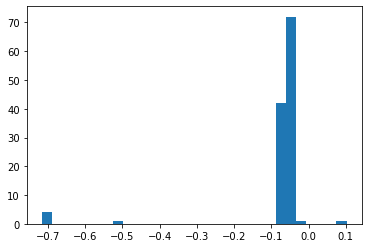

In [79]:
D1_diff_array = diff_array.flatten()
# D1_diff_array = [i for i in D1_diff_array if -0.2 < i < .2]
plt.hist(D1_diff_array, bins=30)
print('Result: ', np.average(D1_diff_array), '+-', np.std(D1_diff_array), '(filtered out 6 outliers)')

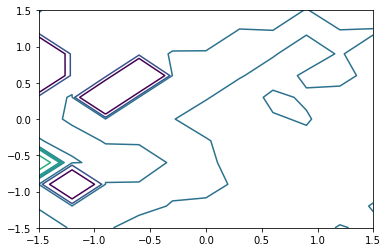

In [66]:
x = np.arange(-1.5, 1.6, 0.3)
plt.contour(x, x, diff_array, levels=[-0.2, -0.1, -0.05, -0.01, 0, 0.01, 0.05, 0.1, 0.2])

### mu_Hxc distribution

Result:  -0.6073151740652775 +- 2.6616271642142992 (filtered out 6 outliers)


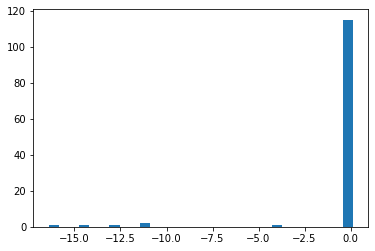

In [93]:
D1_mu_hxc_0 = np.array(mu_hxc_0).flatten()
# D1_diff_array = [i for i in D1_diff_array if -0.2 < i < .2]
plt.hist(D1_mu_hxc_0, bins=30)
print('Result: ', np.average(D1_mu_hxc_0), '+-', np.std(D1_mu_hxc_0), '(filtered out 6 outliers)')

Result:  -0.03270949942089883 +- 0.06631338200284226 (filtered out 6 outliers)


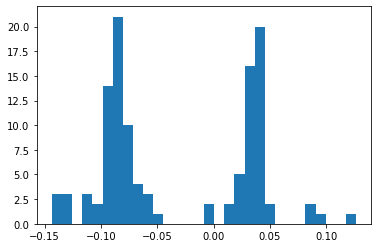

In [94]:
D1_mu_hxc_0 = np.array(mu_hxc_0).flatten()
D1_mu_hxc_0 = [i for i in D1_mu_hxc_0 if -2.5 < i < 2]
plt.hist(D1_mu_hxc_0, bins=30)
print('Result: ', np.average(D1_mu_hxc_0), '+-', np.std(D1_mu_hxc_0), '(filtered out 6 outliers)')

Result:  0.6668565689564415 +- 0.9882418162713911 (filtered out 6 outliers)


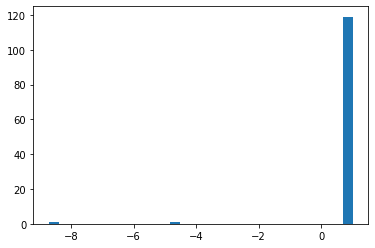

In [96]:
D1_mu_hxc_1 = np.array(mu_hxc_1).flatten()
# D1_mu_hxc_1 = [i for i in D1_mu_hxc_1 if -2.5 < i < 2]
plt.hist(D1_mu_hxc_1, bins=30)
print('Result: ', np.average(D1_mu_hxc_1), '+-', np.std(D1_mu_hxc_1), '(filtered out 6 outliers)')

Result:  0.7902866453340747 +- 0.02558516681330894 (filtered out 6 outliers)


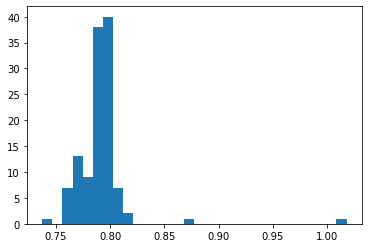

In [98]:
D1_mu_hxc_1 = np.array(mu_hxc_1).flatten()
D1_mu_hxc_1 = [i for i in D1_mu_hxc_1 if -2.5 < i < 2]
plt.hist(D1_mu_hxc_1, bins=30)
print('Result: ', np.average(D1_mu_hxc_1), '+-', np.std(D1_mu_hxc_1), '(filtered out 6 outliers)')

Text(0, 0.5, 'final Hxc chemical potential on sites 0, 3')

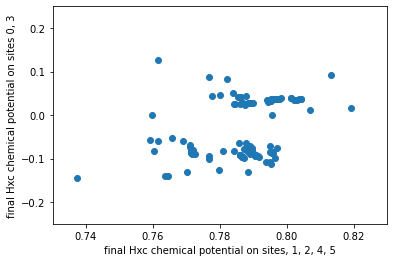

In [113]:
plt.scatter(np.array(mu_hxc_1).flatten(), np.array(mu_hxc_0).flatten())
plt.xlim(0.73, 0.83)
plt.ylim(-.25, .25)
plt.xlabel('final Hxc chemical potential on sites, 1, 2, 4, 5')
plt.ylabel('final Hxc chemical potential on sites 0, 3')

Yaay it looks like the simulation converged all the time even though some of the simulations look to give wrong results (6 out of 121). 
